In [2]:
'''
create a class called Point that takes two parameters x and y and stores them as attributes. Then create a method called distance that takes another Point object and calculates the distance between the two points.

Create an appropriate __str__ method for the class.

'''

import math

class Point:
    def __init__(self, x, y):
        self.x = x
        self.y = y
    
    def distance(self, other_point):
        dx = self.x - other_point.x
        dy = self.y - other_point.y
        distance = math.sqrt(dx**2 + dy**2)
        return distance
    
    def __str__(self):
        return f"({self.x}, {self.y})"

# Example usage:
point1 = Point(1, 2)
point2 = Point(4, 6)

print("Point 1:", point1)
print("Point 2:", point2)
print("Distance between point1 and point2:", point1.distance(point2))

Point 1: (1, 2)
Point 2: (4, 6)
Distance between point1 and point2: 5.0


In [4]:
import math

class Point:
    def __init__(self, x, y):
        self.x = x
        self.y = y
    
    def __str__(self):
        return f"({self.x}, {self.y})"
    

class Line:
    def __init__(self, point1, point2):
        self.point1 = point1
        self.point2 = point2
    
    def length(self):
        # Calculate the Euclidean distance between point1 and point2
        dx = self.point1.x - self.point2.x
        dy = self.point1.y - self.point2.y
        length = math.sqrt(dx**2 + dy**2)
        return length
    
    def slope(self):
        # Calculate the slope of the line using point1 and point2
        dx = self.point2.x - self.point1.x
        dy = self.point2.y - self.point1.y
        
        # Avoid division by zero (vertical line)
        if dx == 0:
            return float('inf')  # Vertical line, return infinity
        else:
            return dy / dx
    
    def point_on_line(self, point):
        # Check if the given point lies on the line defined by self.point1 and self.point2
        
        # Calculate the slope of the line
        line_slope = self.slope()
        
        # Special case: vertical line (infinite slope)
        if math.isinf(line_slope):
            # Check if the x-coordinate of the point matches the x-coordinate of both line endpoints
            if point.x == self.point1.x and (self.point1.y <= point.y <= self.point2.y or self.point2.y <= point.y <= self.point1.y):
                return True
            else:
                return False
        
        # Calculate the y-coordinate on the line using the line equation (y = mx + c)
        # We derive c using one of the points on the line
        c = self.point1.y - line_slope * self.point1.x
        
        # Check if the given point satisfies the line equation y = mx + c
        if point.y == line_slope * point.x + c:
            return True
        else:
            return False
    
    def __str__(self):
        return f"Line({self.point1}, {self.point2})"
        

# Example usage:
point1 = Point(1, 1)
point2 = Point(4, 5)
line = Line(point1, point2)

print("Line:", line)
print("Length of the line:", line.length())
print("Slope of the line:", line.slope())

point_on_line = Point(2, 3)
print(f"Is {point_on_line} on the line?:", line.point_on_line(point_on_line))

point_not_on_line = Point(1, 2)
print(f"Is {point_not_on_line} on the line?:", line.point_on_line(point_not_on_line))
        

Line: Line((1, 1), (4, 5))
Length of the line: 5.0
Slope of the line: 1.3333333333333333
Is (2, 3) on the line?: False
Is (1, 2) on the line?: False


Shape with lines:
((1, 1) -> (4, 1))
((4, 1) -> (4, 4))
((4, 4) -> (1, 4))
((1, 4) -> (1, 1))
Perimeter of the shape: 12.0
Is point (2, 2) on the perimeter?: False
Is point (0, 0) on the perimeter?: False


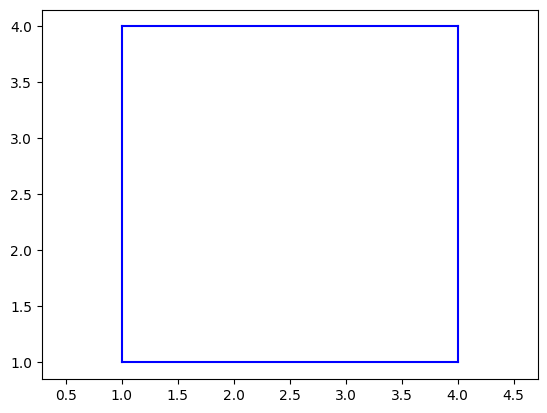

In [6]:
import math
import matplotlib.pyplot as plt

def draw_lines(lines, color):
    for line in lines:
        plt.plot([line.point1.x, line.point2.x], [line.point1.y, line.point2.y], color)
    
    plt.axis('equal')
    plt.show()

class Point:
    def __init__(self, x, y):
        self.x = x
        self.y = y
    
    def __str__(self):
        return f"({self.x}, {self.y})"

class Line:
    def __init__(self, point1, point2):
        self.point1 = point1
        self.point2 = point2
    
    def length(self):
        dx = self.point1.x - self.point2.x
        dy = self.point1.y - self.point2.y
        return math.sqrt(dx**2 + dy**2)
    
    def slope(self):
        dx = self.point2.x - self.point1.x
        dy = self.point2.y - self.point1.y
        if dx == 0:
            return float('inf')
        else:
            return dy / dx
    
    def point_on_line(self, point):
        line_slope = self.slope()
        if math.isinf(line_slope):
            return point.x == self.point1.x and (self.point1.y <= point.y <= self.point2.y or self.point2.y <= point.y <= self.point1.y)
        c = self.point1.y - line_slope * self.point1.x
        return point.y == line_slope * point.x + c
    
    def __str__(self):
        return f"({self.point1} -> {self.point2})"

class Shape:
    def __init__(self, lines):
        self.lines = lines
    
    def perimeter(self):
        perimeter_length = 0
        for line in self.lines:
            perimeter_length += line.length()
        return perimeter_length
    
    def draw(self):
        draw_lines(self.lines, 'b')
    
    def point_on_perimeter(self, point):
        for line in self.lines:
            if line.point_on_line(point):
                return True
        return False
    
    def __str__(self):
        return "Shape with lines:\n" + "\n".join(str(line) for line in self.lines)

# Example usage:
point1 = Point(1, 1)
point2 = Point(4, 1)
point3 = Point(4, 4)
point4 = Point(1, 4)

line1 = Line(point1, point2)
line2 = Line(point2, point3)
line3 = Line(point3, point4)
line4 = Line(point4, point1)

shape = Shape([line1, line2, line3, line4])

print(shape)
print("Perimeter of the shape:", shape.perimeter())
print("Is point (2, 2) on the perimeter?:", shape.point_on_perimeter(Point(2, 2)))
print("Is point (0, 0) on the perimeter?:", shape.point_on_perimeter(Point(0, 0)))

shape.draw()

Rectangle with width 4, height 3, and center (0, 0)
Area of rectangle: 12
Perimeter of rectangle: 14.0
Is point (2, 2) on the perimeter?: False
Square with side 5 and center (0, 0)
Area of square: 25
Perimeter of square: 20.0
Is point (2, 2) on the perimeter?: False
Circle with radius 3, center (0, 0), and 20 sides
Area of circle: 28.274333882308138
Perimeter of circle: 18.84955592153876
Is point (3, 0) on the perimeter?: True


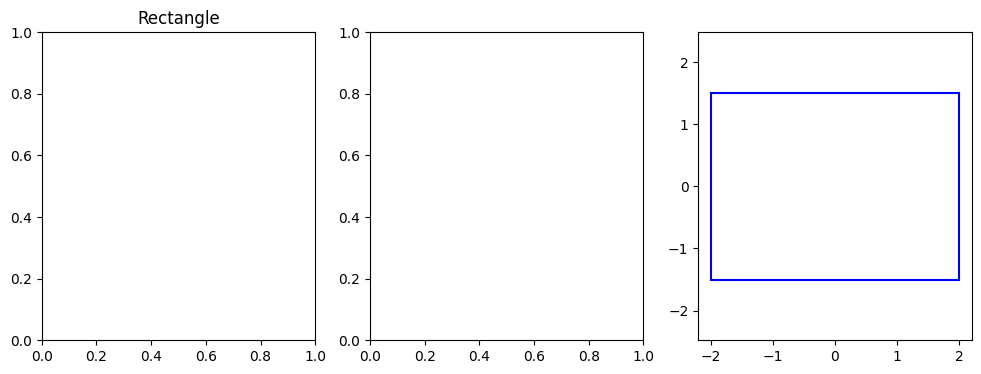

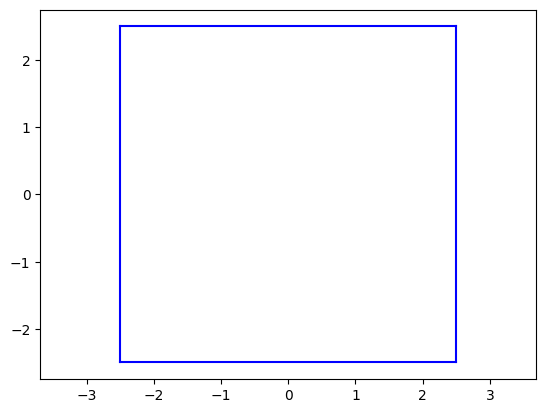

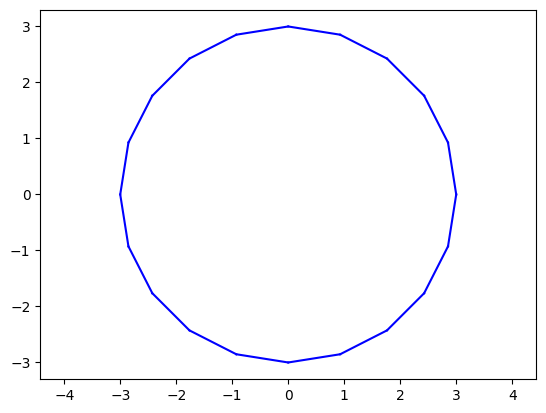

<Figure size 640x480 with 0 Axes>

In [7]:
import math
import matplotlib.pyplot as plt

def draw_lines(lines, color):
    for line in lines:
        plt.plot([line.point1.x, line.point2.x], [line.point1.y, line.point2.y], color)
    
    plt.axis('equal')
    plt.show()

class Point:
    def __init__(self, x, y):
        self.x = x
        self.y = y
    
    def __str__(self):
        return f"({self.x}, {self.y})"

class Line:
    def __init__(self, point1, point2):
        self.point1 = point1
        self.point2 = point2
    
    def length(self):
        dx = self.point1.x - self.point2.x
        dy = self.point1.y - self.point2.y
        return math.sqrt(dx**2 + dy**2)
    
    def slope(self):
        dx = self.point2.x - self.point1.x
        dy = self.point2.y - self.point1.y
        if dx == 0:
            return float('inf')
        else:
            return dy / dx
    
    def point_on_line(self, point):
        line_slope = self.slope()
        if math.isinf(line_slope):
            return point.x == self.point1.x and (self.point1.y <= point.y <= self.point2.y or self.point2.y <= point.y <= self.point1.y)
        c = self.point1.y - line_slope * self.point1.x
        return point.y == line_slope * point.x + c
    
    def __str__(self):
        return f"({self.point1} -> {self.point2})"

class Shape:
    def __init__(self, lines):
        self.lines = lines
    
    def perimeter(self):
        perimeter_length = 0
        for line in self.lines:
            perimeter_length += line.length()
        return perimeter_length
    
    def draw(self):
        draw_lines(self.lines, 'b')
    
    def point_on_perimeter(self, point):
        for line in self.lines:
            if line.point_on_line(point):
                return True
        return False
    
    def __str__(self):
        return "Shape with lines:\n" + "\n".join(str(line) for line in self.lines)

class Rectangle(Shape):
    def __init__(self, width, height, center):
        self.width = width
        self.height = height
        self.center = center
        self.calculate_lines()
    
    def calculate_lines(self):
        x, y = self.center.x, self.center.y
        half_width = self.width / 2
        half_height = self.height / 2
        
        top_left = Point(x - half_width, y + half_height)
        top_right = Point(x + half_width, y + half_height)
        bottom_right = Point(x + half_width, y - half_height)
        bottom_left = Point(x - half_width, y - half_height)
        
        self.lines = [
            Line(top_left, top_right),
            Line(top_right, bottom_right),
            Line(bottom_right, bottom_left),
            Line(bottom_left, top_left)
        ]
    
    def area(self):
        return self.width * self.height
    
    def __str__(self):
        return f"Rectangle with width {self.width}, height {self.height}, and center {self.center}"

class Square(Rectangle):
    def __init__(self, side, center):
        super().__init__(side, side, center)
        self.side = side
    
    def __str__(self):
        return f"Square with side {self.side} and center {self.center}"

class Circle(Shape):
    def __init__(self, radius, center, num_sides=20):
        self.radius = radius
        self.center = center
        self.num_sides = num_sides
        self.calculate_lines()
    
    def calculate_lines(self):
        self.lines = []
        angle_increment = 2 * math.pi / self.num_sides
        start_angle = 0
        
        for i in range(self.num_sides):
            start_point = Point(self.center.x + self.radius * math.cos(start_angle),
                                self.center.y + self.radius * math.sin(start_angle))
            end_point = Point(self.center.x + self.radius * math.cos(start_angle + angle_increment),
                              self.center.y + self.radius * math.sin(start_angle + angle_increment))
            self.lines.append(Line(start_point, end_point))
            start_angle += angle_increment
    
    def area(self):
        return math.pi * self.radius**2
    
    def perimeter(self):
        return 2 * math.pi * self.radius
    
    def point_on_perimeter(self, point):
        dx = point.x - self.center.x
        dy = point.y - self.center.y
        distance_from_center = math.sqrt(dx**2 + dy**2)
        
        return math.isclose(distance_from_center, self.radius)
    
    def __str__(self):
        return f"Circle with radius {self.radius}, center {self.center}, and {self.num_sides} sides"

# Example usage:

# Creating a Rectangle
rect_center = Point(0, 0)
rectangle = Rectangle(4, 3, rect_center)
print(rectangle)
print("Area of rectangle:", rectangle.area())
print("Perimeter of rectangle:", rectangle.perimeter())
print("Is point (2, 2) on the perimeter?:", rectangle.point_on_perimeter(Point(2, 2)))

# Creating a Square
square_center = Point(0, 0)
square = Square(5, square_center)
print(square)
print("Area of square:", square.area())
print("Perimeter of square:", square.perimeter())
print("Is point (2, 2) on the perimeter?:", square.point_on_perimeter(Point(2, 2)))

# Creating a Circle
circle_center = Point(0, 0)
circle = Circle(3, circle_center)
print(circle)
print("Area of circle:", circle.area())
print("Perimeter of circle:", circle.perimeter())
print("Is point (3, 0) on the perimeter?:", circle.point_on_perimeter(Point(3, 0)))

# Drawing shapes using matplotlib
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12, 4))

ax1.set_title("Rectangle")
rectangle.draw()

ax2.set_title("Square")
square.draw()

ax3.set_title("Circle")
circle.draw()

plt.tight_layout()
plt.show()

In [8]:
class Employee:
    def __init__(self, name, age, salary):
        self.name = name
        self.age = age
        self.salary = salary
    
    def __str__(self):
        return f"{self.name}, Age: {self.age}, Salary: ${self.salary:.2f}"

class Manager(Employee):
    def __init__(self, name, age, salary, department):
        super().__init__(name, age, salary)
        self.department = department
    
    def __str__(self):
        return f"Manager: {self.name}, Age: {self.age}, Salary: ${self.salary:.2f}, Department: {self.department}"

class Developer(Employee):
    def __init__(self, name, age, salary, programming_language):
        super().__init__(name, age, salary)
        self.programming_language = programming_language
    
    def __str__(self):
        return f"Developer: {self.name}, Age: {self.age}, Salary: ${self.salary:.2f}, Programming Language: {self.programming_language}"

class Company:
    def __init__(self):
        self.employees = []
    
    def add_employee(self, employee):
        self.employees.append(employee)
        print(f"Added {type(employee).__name__}: {employee.name} to the company.")
    
    def display_employees(self):
        if not self.employees:
            print("No employees in the company.")
        else:
            print("List of Employees:")
            for employee in self.employees:
                print("-", employee)
    
    def calculate_total_salary(self):
        total_salary = sum(employee.salary for employee in self.employees)
        print(f"Total Salary of all employees: ${total_salary:.2f}")


# Function to create a new employee based on user input
def create_employee():
    print("\nChoose type of employee to add:")
    print("1. Manager")
    print("2. Developer")
    employee_type = input("Enter choice (1/2): ")

    name = input("Enter employee's name: ")
    age = int(input("Enter employee's age: "))
    salary = float(input("Enter employee's salary: $"))

    if employee_type == '1':
        department = input("Enter manager's department: ")
        return Manager(name, age, salary, department)
    elif employee_type == '2':
        programming_language = input("Enter developer's programming language: ")
        return Developer(name, age, salary, programming_language)
    else:
        print("Invalid choice. Defaulting to Developer.")
        programming_language = input("Enter developer's programming language: ")
        return Developer(name, age, salary, programming_language)


# Main program loop
company = Company()

while True:
    print("\nEmployee Management System Menu:")
    print("1. Add a new employee")
    print("2. Display all employees")
    print("3. Calculate total salary")
    print("4. Exit")
    choice = input("Enter your choice (1-4): ")

    if choice == '1':
        new_employee = create_employee()
        company.add_employee(new_employee)
    elif choice == '2':
        company.display_employees()
    elif choice == '3':
        company.calculate_total_salary()
    elif choice == '4':
        print("Exiting Employee Management System. Goodbye!")
        break
    else:
        print("Invalid choice. Please enter a number between 1 and 4.")


Employee Management System Menu:
1. Add a new employee
2. Display all employees
3. Calculate total salary
4. Exit
No employees in the company.

Employee Management System Menu:
1. Add a new employee
2. Display all employees
3. Calculate total salary
4. Exit
No employees in the company.

Employee Management System Menu:
1. Add a new employee
2. Display all employees
3. Calculate total salary
4. Exit
Total Salary of all employees: $0.00

Employee Management System Menu:
1. Add a new employee
2. Display all employees
3. Calculate total salary
4. Exit
Exiting Employee Management System. Goodbye!
